In [2]:
import tensorflow as tf 
from classification.pre_process.Prep_CSV import Prep_CSV
from classification.pre_process.Preprocessing import Preprocessing 
from utils.predict_process import *

from sklearn.model_selection import train_test_split

In [3]:
model_path = '/home/deeplearning/Deep_Learning_result/classic_model_test/classic_model'

model = tf.keras.models.load_model(model_path)

In [4]:
model.summary()

______________________________
head (Dense)                    (None, 2)            258         dropout_2[0][0]                  
__________________________________________________________________________________________________
leg (Dense)                     (None, 3)            387         dropout_2[0][0]                  
__________________________________________________________________________________________________
right_arm (Dense)               (None, 2)            258         dropout_2[0][0]                  
__________________________________________________________________________________________________
left_arm (Dense)                (None, 2)            258         dropout_2[0][0]                  
Total params: 13,853,897
Trainable params: 13,853,897
Non-trainable params: 0
__________________________________________________________________________________________________


In [4]:
json_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/result.json'
nifti_directory = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92'
objet = Prep_CSV(json_path)
objet.result_csv(nifti_directory)
print(objet.csv_result_path)

prep_objet = Preprocessing(objet.csv_result_path)
X, y = prep_objet.normalize_encoding_dataset()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.15) #random state 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.15)
print("size of X_train : ", X_train.shape)
print("size of y_train : ",y_train.shape)
print("")
print("size of X_test : ", X_test.shape)
print("size of y_test : ",y_test.shape)
print("")
print("size of X_val : ", X_val.shape)
print("size of y_val : ",y_val.shape)

/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/classif_test_png.csv
size of X_train :  (1571, 503, 136, 1)
size of y_train :  (1571, 4)

size of X_test :  (327, 503, 136, 1)
size of y_test :  (327, 4)

size of X_val :  (278, 503, 136, 1)
size of y_val :  (278, 4)


In [5]:
#dataset 

import pandas as pd 
import csv 

csv_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/classif_test_png.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)

del dataset[0]

In [6]:
table = pd.DataFrame(dataset, columns=['STUDY_UID', 'NIFTI', 'UPPER_LIMIT', 'LOWER_LIMIT', 'RIGHT_ARM', 'LEFT_ARM'])
table[0:1]



,STUDY_UID,NIFTI,UPPER_LIMIT,LOWER_LIMIT,RIGHT_ARM,LEFT_ARM
0,1.2.276.0.7230010.3.2.212610,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,up,up


In [7]:
train, test = train_test_split(table, test_size = 0.15)

In [8]:
train

,STUDY_UID,NIFTI,UPPER_LIMIT,LOWER_LIMIT,RIGHT_ARM,LEFT_ARM
306,1.2.250.1.199.10.90001.92661.20130321125241,/media/deeplearning/Elements/classif_ct/image_...,Eye,Hips,up,up
1877,1.2.250.1.59.453.859.92444169.2584.1384851318....,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,up,up
1195,1.2.250.1.74.20150216120000.1000046003779,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,down,down
1812,1.2.276.0.7230010.3.1.2.3003270646.2712.137234...,/media/deeplearning/Elements/classif_ct/image_...,Eye,Hips,up,up
1575,1.2.250.1.199.14.900278.9297455.20140224091853,/media/deeplearning/Elements/classif_ct/image_...,Mouth,Hips,up,up
...,...,...,...,...,...,...
1332,1.3.51.0.1.1.10.49.10.222.2091847.2090385,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,down,down
743,1.2.840.113619.2.290.3.17438691.553.1394693450...,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,up,up
1446,1.2.250.1.74.20150108124500.28000034704256,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Hips,up,up
403,1.2.276.0.7230010.3.2.155727,/media/deeplearning/Elements/classif_ct/image_...,Vertex,Knee,down,down


In [9]:
#evaluate model on test set 

model.metrics_names

['loss',
 'head_loss',
 'leg_loss',
 'right_arm_loss',
 'left_arm_loss',
 'head_accuracy',
 'leg_accuracy',
 'right_arm_accuracy',
 'left_arm_accuracy']

In [10]:
result = model.evaluate(X_test,  {'head': y_test[:,0], 
                                    'leg': y_test[:,1],
                                    'right_arm' : y_test[:,2],
                                    'left_arm' : y_test[:,3] ,
                                    })
dict(zip(model.metrics_names, result))        

11/11 [==============================] - 1s 120ms/step - loss: 0.0271 - head_loss: 0.0505 - leg_loss: 0.0308 - right_arm_loss: 0.0033 - left_arm_loss: 0.0239 - head_accuracy: 0.5229 - leg_accuracy: 0.9113 - right_arm_accuracy: 0.2294 - left_arm_accuracy: 0.2294


{'loss': 0.027126483619213104,
 'head_loss': 0.050522468984127045,
 'leg_loss': 0.030805526301264763,
 'right_arm_loss': 0.0032844259403645992,
 'left_arm_loss': 0.023893525823950768,
 'head_accuracy': 0.5229358077049255,
 'leg_accuracy': 0.9113149642944336,
 'right_arm_accuracy': 0.2293577939271927,
 'left_arm_accuracy': 0.2293577939271927}

In [11]:
#prediction 
pred = model.predict(X_test)

In [12]:
predi = decodage_predictions(pred)
print(len(predi))
print(predi[0])

327
['Eye / Mouth', 'Knee', 'down', 'down']


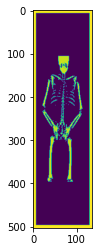

[1 1 0 0]
['Eye / Mouth', 'Knee', 'down', 'down']


In [13]:
truth = decodage_truth(y_test)
plt.imshow(X_test[0][:,:,0])
plt.show()
print(y_test[0])
print(truth[0])

In [14]:
directory = '/home/deeplearning/Deep_Learning_result/classif_model_test'

In [ ]:
affichage(X_test, predi, truth, directory)